In [26]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import os
import cv2
from PIL import Image
from math import floor, ceil, pi
from glob import glob                                                           

In [10]:
images_train = glob('im_base_to_angle/started_state/train/*.bmp')
images_test = glob('im_base_to_angle/started_state/test/*.jpg')
images_val = glob('im_base_to_angle/started_state/val/*.bmp')

def convert_image_format(images_folder, needed_format):
    images = glob(images_folder)
    for j in images:
        img = cv2.imread(j)
        cv2.imwrite(j[:-3] + needed_format, img)
        
# convert_image_format('im_base_to_angle/started_state/val/*.bmp', 'png')
# print(images)

In [53]:
img = matplotlib.pyplot.imread('im_base_to_angle/started_state/train/19.png')
# tf_img = tf.convert_to_tensor(img)
resized_images=tf.image.resize_images(img, [600, 600])
print(resized_images)

Tensor("resize_images_2/Squeeze:0", shape=(600, 600, 3), dtype=float32)


In [4]:
def get_image_paths():
    folder = 'im_base_to_angle/started_state/train'
    files = os.listdir(folder)
    files.sort()
    files = ['{}/{}'.format(folder, file) for file in files]
    return files

In [21]:
X_img_paths = get_image_paths()
print(X_img_paths)

['im_base_to_angle/started_state/train/109.png', 'im_base_to_angle/started_state/train/118.png', 'im_base_to_angle/started_state/train/126.png', 'im_base_to_angle/started_state/train/134.png', 'im_base_to_angle/started_state/train/138.png', 'im_base_to_angle/started_state/train/144.png', 'im_base_to_angle/started_state/train/152.png', 'im_base_to_angle/started_state/train/159.png', 'im_base_to_angle/started_state/train/162.png', 'im_base_to_angle/started_state/train/175.png', 'im_base_to_angle/started_state/train/176.png', 'im_base_to_angle/started_state/train/19.png', 'im_base_to_angle/started_state/train/25.png', 'im_base_to_angle/started_state/train/34.png', 'im_base_to_angle/started_state/train/38.png', 'im_base_to_angle/started_state/train/43.png', 'im_base_to_angle/started_state/train/52.png', 'im_base_to_angle/started_state/train/53.png', 'im_base_to_angle/started_state/train/64.png', 'im_base_to_angle/started_state/train/66.png']


In [42]:
IMAGE_SIZE = 600

def tf_resize_images(X_img_file_paths):
    X_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize_images(X, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        # Each image is resized individually as different image may be of different size.
        for index, file_path in enumerate(X_img_file_paths):
            img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
            resized_img = sess.run(tf_img, feed_dict = {X: img})
            X_data.append(resized_img)

    X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    return X_data

In [43]:
X_imgs = tf_resize_images(X_img_paths)
print(X_imgs.shape)

(20, 600, 600, 3)


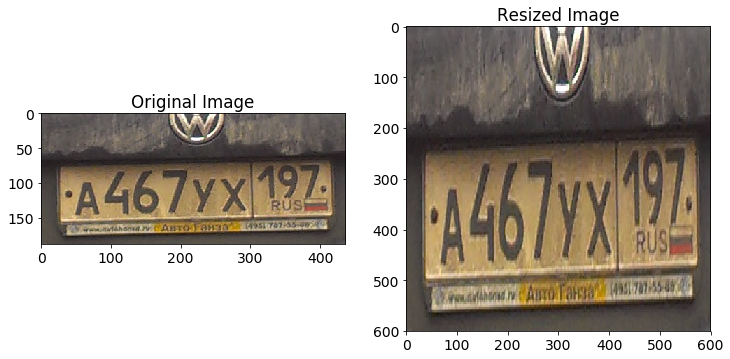

In [47]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize = (12, 12))
plt.subplot(1, 2, 1)
plt.imshow(mpimg.imread(X_img_paths[0])[:,:,:3])
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(X_imgs[0])
plt.title('Resized Image')
plt.show()
# cv2.imwrite('test.png',X_imgs[0])
# print(X_imgs[0])
# im = Image.fromarray(np.squeeze(X_imgs[0]) * 255).astype('uint8').convert("RGB")
# im.save("your_file.jpeg")

In [ ]:
prefix = '\my\path\prefix'
ext = 'jpg'
for suffix, data in enumerate(X_imgs[0]):
    print(data.shape)
    data.dtype = np.uint8
    im = Image.fromarray(data, mode = 'RGB')
    print(f'{prefix}_{suffix}.{ext}')
    im.save(f'{prefix}_{suffix}.{ext}', 'JPEG')

In [51]:
X_imgs[0].dtype = np.uint8
print(X_imgs[0])
# im = Image.fromarray(data, mode = 'RGB')

[[[0.35686275 0.34117648 0.34509805]
  [0.35686275 0.34117648 0.34509805]
  [0.3529412  0.3372549  0.34117648]
  ...
  [0.45882353 0.4392157  0.42745098]
  [0.45490196 0.43529412 0.42352942]
  [0.45490196 0.43529412 0.42352942]]

 [[0.35686275 0.34117648 0.34509805]
  [0.35686275 0.34117648 0.34509805]
  [0.3529412  0.3372549  0.34117648]
  ...
  [0.45882353 0.4392157  0.42745098]
  [0.45490196 0.43529412 0.42352942]
  [0.45490196 0.43529412 0.42352942]]

 [[0.35686275 0.34117648 0.34509805]
  [0.35686275 0.34117648 0.34509805]
  [0.3529412  0.3372549  0.34117648]
  ...
  [0.45882353 0.4392157  0.42745098]
  [0.45490196 0.43529412 0.42352942]
  [0.45490196 0.43529412 0.42352942]]

 ...

 [[0.37254903 0.34117648 0.33333334]
  [0.37254903 0.34117648 0.33333334]
  [0.35686275 0.3372549  0.32156864]
  ...
  [0.38039216 0.37254903 0.3764706 ]
  [0.39215687 0.38431373 0.3882353 ]
  [0.40784314 0.4        0.40392157]]

 [[0.37254903 0.34117648 0.33333334]
  [0.37254903 0.34117648 0.33333334]


In [ ]:
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("resized", resized)